In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

# Data

In [4]:
t_dataset = pd.read_csv("T_data_.csv")
t_dataset

,nSub,nARC,thARC,T_mean,T_SD
0,1.0,2.0,0.0,0.999999,0.000002
1,1.0,1.0,0.0,0.999999,0.000002
2,1.0,1.0,0.2,0.999999,0.000003
3,1.0,1.0,0.4,0.999999,0.000003
4,1.0,1.0,0.6,1.000000,0.000002
...,...,...,...,...,...
1501,5.0,5.0,0.2,0.555554,0.000005
1502,5.0,5.0,0.4,0.555533,0.000059
1503,5.0,5.0,0.6,0.554505,0.001815
1504,5.0,5.0,0.8,0.555558,0.000040


In [5]:
t_dataset.isnull().sum()

nSub      0
nARC      0
thARC     0
T_mean    0
T_SD      0
dtype: int64

In [6]:
x_data = t_dataset.drop("T_mean", axis = 1, inplace = False)
x_data = x_data.drop("T_SD", axis = 1, inplace = False)

y_data = t_dataset.drop("nSub", axis = 1, inplace = False)
y_data = y_data.drop("nARC", axis = 1, inplace = False)
y_data = y_data.drop("thARC", axis = 1, inplace = False)

y_data

,T_mean,T_SD
0,0.999999,0.000002
1,0.999999,0.000002
2,0.999999,0.000003
3,0.999999,0.000003
4,1.000000,0.000002
...,...,...
1501,0.555554,0.000005
1502,0.555533,0.000059
1503,0.554505,0.001815
1504,0.555558,0.000040


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 1)

In [8]:
print('t_train_x',x_train.shape)
print('t_train_y',y_train.shape)
print('t_test_x',x_test.shape)
print('t_test_y',y_test.shape)

t_train_x (1054, 3)
t_train_y (1054, 2)
t_test_x (452, 3)
t_test_y (452, 2)


In [9]:
# Loss function
def MSE(real, predict):
    error = ((real-predict)**2).mean()
    
    return error

# Linear Regression

## Model

Mean Squared Error: T_mean    0.017143
T_SD      0.000694
dtype: float64
0.34113980879170364
0.3114001541483711


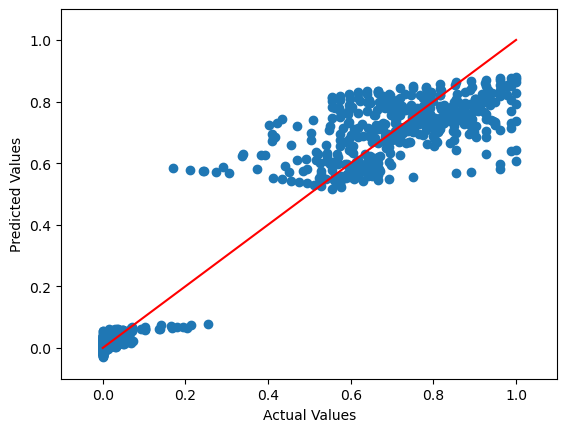

In [10]:
reg = LinearRegression()
reg.fit(x_train, y_train)

reg_pred = reg.predict(x_test)

# 모델 평가
mse = MSE(y_test, reg_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.scatter(y_test,reg_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

# Ridge

## Model

Mean Squared Error: T_mean    0.017143
T_SD      0.000694
dtype: float64
0.3411398082282827
0.3114012259256964


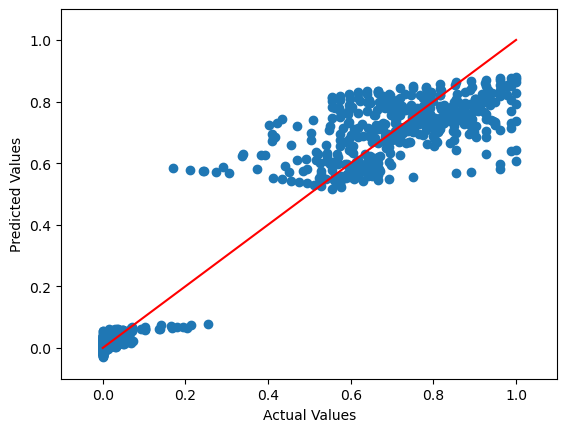

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01)
ridge.fit(x_train, y_train)

ridge_pred = ridge.predict(x_test)

# 모델 평가
mse = MSE(y_test, ridge_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))
plt.scatter(y_test,ridge_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

## Optimize

In [12]:
from bayes_opt import BayesianOptimization

def train_acc(alpha):
    
    ridge_final = Ridge(alpha=alpha)
    ridge_final.fit(x_train, y_train)
    
   # Validation
    y_pred = ridge_final.predict(x_test)
    acc= ridge_final.score(x_test, y_test)
    
    return acc

pbounds = {'alpha': (0.1, 10)} # 범위 설정

optimizer = BayesianOptimization(
    f=train_acc,
    pbounds=pbounds ,
    random_state=1)

optimizer.maximize(init_points=5 , n_iter= 100) 

|   iter    |  target   |   alpha   |
-------------------------------------
| 1         | 0.3117    | 4.229     |
| 2         | 0.3118    | 7.231     |
| 3         | 0.3114    | 0.1011    |
| 4         | 0.3117    | 3.093     |
| 5         | 0.3115    | 1.553     |
| 6         | 0.3117    | 10.0      |
| 7         | 0.3118    | 6.118     |
| 8         | 0.3118    | 8.349     |
| 9         | 0.3118    | 7.636     |
| 10        | 0.3118    | 6.891     |
| 11        | 0.3118    | 7.231     |
| 12        | 0.3118    | 7.199     |
| 13        | 0.3118    | 7.298     |
| 14        | 0.3118    | 7.159     |
| 15        | 0.3118    | 7.287     |
| 16        | 0.3118    | 7.165     |
| 17        | 0.3118    | 7.176     |
| 18        | 0.3118    | 7.289     |
| 19        | 0.3118    | 7.177     |
| 20        | 0.3118    | 7.278     |
| 21        | 0.3118    | 7.179     |
| 22        | 0.3118    | 7.267     |
| 23        | 0.3118    | 7.182     |
| 24        | 0.3118    | 7.263     |
| 25        

Mean Squared Error: T_mean    0.017142
T_SD      0.000693
dtype: float64
0.3408774052393511
0.3117654439811434


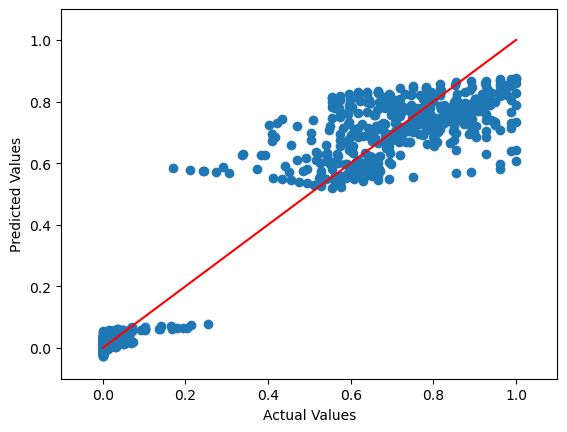

In [13]:
from sklearn.linear_model import Ridge

ridge_final = Ridge(alpha=7.224)
ridge_final.fit(x_train, y_train)

ridge_final_pred = ridge_final.predict(x_test)

# 모델 평가
mse = MSE(y_test, ridge_final_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

print(ridge_final.score(x_train, y_train))
print(ridge_final.score(x_test, y_test))
plt.scatter(y_test,ridge_final_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

# Decision Trees

## Model

Mean Squared Error: T_mean    0.000583
T_SD      0.000074
dtype: float64
1.0
0.9513386866290634


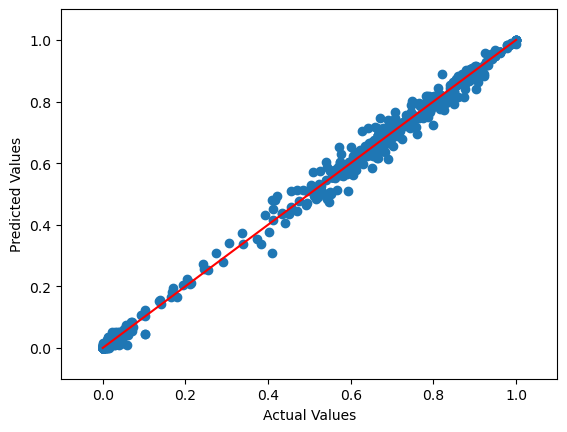

In [14]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

dt_pred = dt.predict(x_test)

# 모델 평가
mse = MSE(y_test, dt_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))
plt.scatter(y_test,dt_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

# Random Forest

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Model

Mean Squared Error: T_mean    0.000205
T_SD      0.000020
dtype: float64
0.9963614467864625
0.9860269076865498


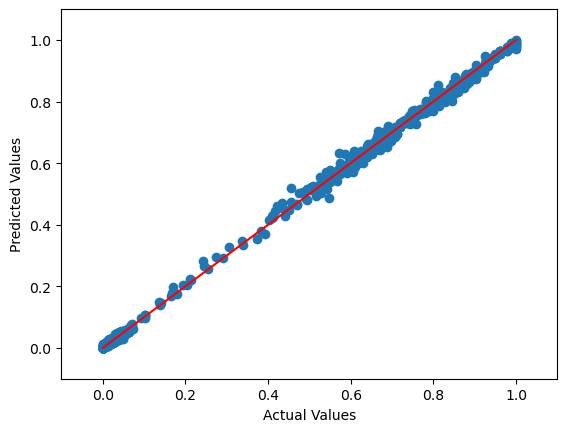

In [16]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

rf_pred = rf.predict(x_test)
# 모델 평가
mse = MSE(y_test, rf_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))
plt.scatter(y_test,rf_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

## Optimize

In [17]:
from bayes_opt import BayesianOptimization

def train_acc(n_estimators):
    
    rf_final = RandomForestRegressor(n_estimators=int(n_estimators), random_state=42)
    rf_final.fit(x_train, y_train)
    
   # Validation
    y_pred = rf_final.predict(x_test)
    acc= rf_final.score(x_test, y_test)
    
    return acc

pbounds = {'n_estimators': (10, 500)} # 범위 설정

optimizer = BayesianOptimization(
    f=train_acc,
    pbounds=pbounds ,
    random_state=1)

optimizer.maximize(init_points=5 , n_iter= 100) 

|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.9857    | 214.3     |
| 2         | 0.9856    | 363.0     |
| 3         | 0.9782    | 10.06     |
| 4         | 0.9856    | 158.1     |
| 5         | 0.986     | 81.91     |
| 6         | 0.986     | 83.56     |
| 7         | 0.9859    | 290.2     |
| 8         | 0.9857    | 442.1     |
| 9         | 0.9857    | 500.0     |
| 10        | 0.9856    | 402.7     |
| 11        | 0.9858    | 253.2     |
| 12        | 0.9856    | 325.9     |
| 13        | 0.9857    | 472.2     |
| 14        | 0.9858    | 125.8     |
| 15        | 0.9855    | 187.6     |
| 16        | 0.9859    | 272.4     |
| 17        | 0.9861    | 107.6     |
| 18        | 0.9857    | 422.5     |
| 19        | 0.9857    | 233.8     |
| 20        | 0.9857    | 307.0     |
| 21        | 0.9858    | 70.88     |
| 22        | 0.9856    | 382.0     |
| 23        | 0.986     | 113.9     |
| 24        | 0.986     | 100.1     |
| 25        

Mean Squared Error: T_mean    0.00020
T_SD      0.00002
dtype: float64
0.996412359980736
0.9862493069900307


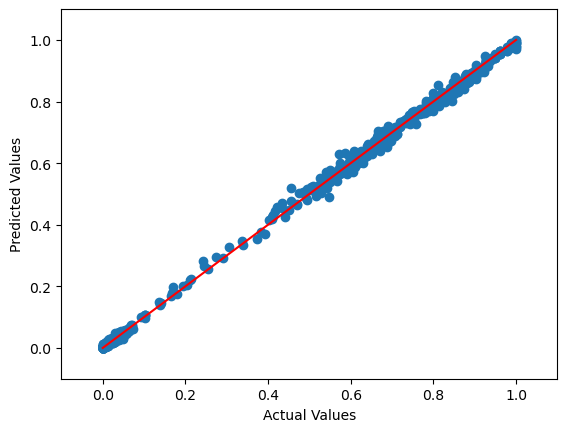

In [32]:
rf_final = RandomForestRegressor(n_estimators=89, random_state=42)
rf_final.fit(x_train, y_train)

rf_final_pred = rf_final.predict(x_test)
# 모델 평가
mse = MSE(y_test, rf_final_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

print(rf_final.score(x_train, y_train))
print(rf_final.score(x_test, y_test))
plt.scatter(y_test,rf_final_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

In [34]:
rf_final.predict([[3.4, 1.8, 0.5]])

array([[0.73415785, 0.01261575]])

# Support Vector Machines

## Model

Mean Squared Error: T_mean    0.009517
T_SD      0.005670
dtype: float64
-1.1929878176233082
-2.029202992906838


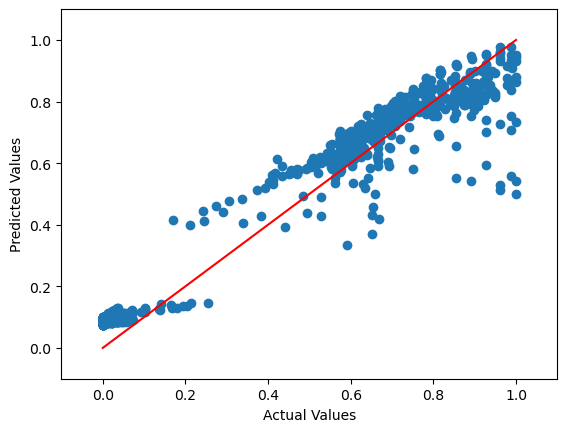

In [19]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

svr = MultiOutputRegressor(SVR(kernel='rbf', gamma=0.1, C=0.1))
svr.fit(x_train, y_train)

svr_pred = svr.predict(x_test)
# 모델 평가
mse = MSE(y_test, svr_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

print(svr.score(x_train, y_train))
print(svr.score(x_test, y_test))
plt.scatter(y_test,svr_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

## Optimize

In [20]:
def train_acc(gamma, C):
    
    svr_final = MultiOutputRegressor(SVR(kernel='rbf', gamma=gamma, C=C))
    svr_final.fit(x_train, y_train)
    
   # Validation
    y_pred = svr_final.predict(x_test)
    acc= svr_final.score(x_test, y_test)
    
    return acc

pbounds = {'gamma': (0.1, 10), 'C': (0.1, 10)} # 범위 설정

optimizer = BayesianOptimization(
    f=train_acc,
    pbounds=pbounds ,
    random_state=1)

optimizer.maximize(init_points=5 , n_iter= 100) 

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | -2.806    | 4.229     | 7.231     |
| 2         | -2.741    | 0.1011    | 3.093     |
| 3         | -2.566    | 1.553     | 1.014     |
| 4         | -2.728    | 1.944     | 3.521     |
| 5         | -2.776    | 4.028     | 5.434     |
| 6         | -0.3652   | 2.958     | 0.1       |
| 7         | -2.797    | 8.317     | 6.635     |
| 8         | -2.792    | 1.578     | 6.325     |
| 9         | -2.81     | 0.9521    | 7.611     |
| 10        | -0.3968   | 3.381     | 0.1       |
| 11        | -0.4188   | 5.485     | 0.1       |
| 12        | -0.4133   | 7.563     | 0.1       |
| 13        | -2.655    | 6.86      | 1.939     |
| 14        | -0.4101   | 9.712     | 0.1       |
| 15        | -2.656    | 10.0      | 1.919     |
| 16        | -2.838    | 10.0      | 10.0      |
| 17        | -0.4116   | 8.691     | 0.1       |
| 18        | -2.838    | 5.786     | 10.0      |


| 100       | -2.807    | 0.1       | 6.552     |
| 101       | -2.812    | 9.982     | 7.839     |
| 102       | -2.828    | 0.1246    | 8.573     |
| 103       | -2.838    | 7.048     | 10.0      |
| 104       | -2.791    | 5.079     | 6.21      |
| 105       | -2.747    | 3.247     | 4.2       |


Mean Squared Error: T_mean    0.006821
T_SD      0.001405
dtype: float64
0.3289839295922876
0.16074319760105266


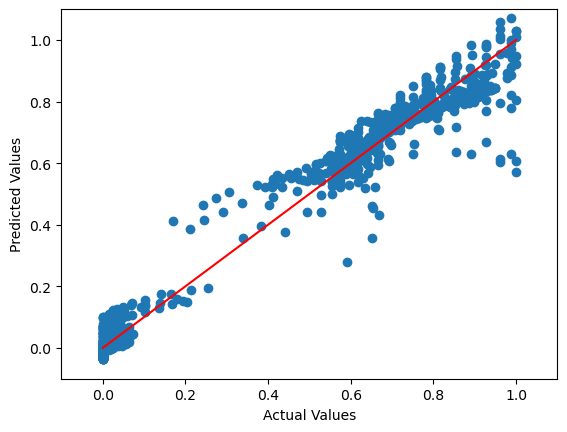

In [21]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

svr_final = MultiOutputRegressor(SVR(kernel='rbf', gamma=0.04943, C=3.237))
svr_final.fit(x_train, y_train)

svr_final_pred = svr_final.predict(x_test)

# 모델 평가
mse = MSE(y_test, svr_final_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

print(svr_final.score(x_train, y_train))
print(svr_final.score(x_test, y_test))
plt.scatter(y_test,svr_final_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

# Neural Networks

## Model

2023-12-08 18:08:21.081126: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
53/53 [==============================] - 1s 6ms/step - loss: 0.0668 - val_loss: 0.0371
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0310 - val_loss: 0.0212
Epoch 3/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.0135
Epoch 4/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.0081
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0052
Epoch 6/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0046
Epoch 7/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0039
Epoch 8/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 9/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 10/50
53/53 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 11/50
53/53 [

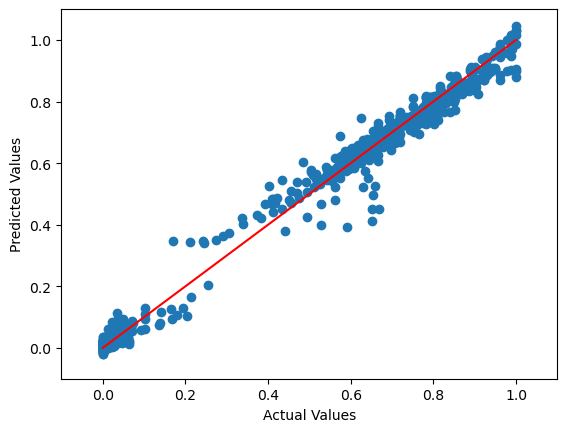

In [24]:
import tensorflow as tf

# 다중 출력을 다루는 신경망 모델 정의
nn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2)  # 출력 레이어의 뉴런이 2개 (다중 출력)
])

# 모델 컴파일
nn.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
nn.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

nn_pred = nn.predict(x_test)

# 모델 평가
mse = MSE(y_test, nn_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

# 작을 수록 더 좋음
print(nn.evaluate(x_train, y_train))
print(nn.evaluate(x_test, y_test))

plt.scatter(y_test,nn_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

## Optimize

In [25]:
from bayes_opt import BayesianOptimization

def train_acc(epochs, batch_size):
    
    # 다중 출력을 다루는 신경망 모델 정의
    nn_final = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(2)  # 출력 레이어의 뉴런이 2개 (다중 출력)
    ])

    # 모델 컴파일
    nn_final.compile(optimizer='adam', loss='mean_squared_error')

    # 모델 훈련
    nn_final.fit(x_train, y_train, epochs=int(epochs), batch_size=int(batch_size), validation_split=0.2, verbose=0)
    
   # Validation
    nn_final_pred = nn_final.predict(x_test)
    acc= nn_final.evaluate(x_test, y_test)
    
    return -acc

pbounds = {'epochs': (10, 100), 'batch_size': (10, 100)} # 범위 설정

optimizer = BayesianOptimization(
    f=train_acc,
    pbounds=pbounds ,
    random_state=1)

optimizer.maximize(init_points=5 , n_iter= 100) 

|   iter    |  target   | batch_... |  epochs   |
-------------------------------------------------
15/15 [==============================] - 0s 2ms/step - loss: 0.0014
| 1         | -0.001438 | 47.53     | 74.83     |
15/15 [==============================] - 0s 2ms/step - loss: 0.0018
| 2         | -0.001789 | 10.01     | 37.21     |
15/15 [==============================] - 0s 2ms/step - loss: 0.0041
| 3         | -0.004138 | 23.21     | 18.31     |
15/15 [==============================] - 0s 2ms/step - loss: 0.0011
| 4         | -0.001081 | 26.76     | 41.1      |
15/15 [==============================] - 0s 2ms/step - loss: 0.0022
| 5         | -0.002167 | 45.71     | 58.49     |
15/15 [==============================] - 0s 2ms/step - loss: 0.0014
| 6         | -0.001446 | 26.14     | 42.26     |
15/15 [==============================] - 0s 1ms/step - loss: 0.0019
| 7         | -0.001864 | 30.52     | 36.71     |
15/15 [==============================] - 0s 1ms/step - loss: 0.0033
| 8   

15/15 [==============================] - 0s 2ms/step - loss: 8.5357e-04
| 41        | -0.000853 | 20.73     | 81.89     |
15/15 [==============================] - 0s 2ms/step - loss: 9.4666e-04
| 42        | -0.000946 | 21.32     | 79.1      |
15/15 [==============================] - 0s 1ms/step - loss: 8.6435e-04
| 43        | -0.000864 | 18.06     | 80.56     |
15/15 [==============================] - 0s 2ms/step - loss: 6.3268e-04
| 44        | -0.000632 | 18.24     | 84.3      |
15/15 [==============================] - 0s 2ms/step - loss: 7.8841e-04
| 45        | -0.000788 | 15.82     | 83.16     |
15/15 [==============================] - 0s 2ms/step - loss: 0.0014
| 46        | -0.001362 | 16.27     | 86.79     |
15/15 [==============================] - 0s 2ms/step - loss: 9.0819e-04
| 47        | -0.000908 | 20.96     | 85.74     |
15/15 [==============================] - 0s 2ms/step - loss: 5.8546e-04
| 48        | -0.000585 | 14.75     | 79.26     |
15/15 [=====================

15/15 [==============================] - 0s 2ms/step - loss: 0.0011
| 81        | -0.001112 | 15.24     | 58.72     |
15/15 [==============================] - 0s 2ms/step - loss: 0.0018
| 82        | -0.00183  | 22.19     | 56.09     |
15/15 [==============================] - 0s 2ms/step - loss: 8.1518e-04
| 83        | -0.000815 | 10.33     | 72.16     |
15/15 [==============================] - 0s 2ms/step - loss: 0.0090
| 84        | -0.008965 | 79.78     | 17.41     |
15/15 [==============================] - 0s 2ms/step - loss: 0.0018
| 85        | -0.001806 | 99.24     | 99.86     |
15/15 [==============================] - 0s 2ms/step - loss: 0.0050
| 86        | -0.00495  | 99.99     | 59.9      |
15/15 [==============================] - 0s 2ms/step - loss: 0.0015
| 87        | -0.001506 | 72.51     | 99.05     |
15/15 [==============================] - 0s 2ms/step - loss: 0.0028
| 88        | -0.002829 | 71.35     | 48.18     |
15/15 [==============================] - 0s 2ms/step

Epoch 1/77
57/57 [==============================] - 1s 5ms/step - loss: 0.0479 - val_loss: 0.0288
Epoch 2/77
57/57 [==============================] - 0s 3ms/step - loss: 0.0265 - val_loss: 0.0196
Epoch 3/77
57/57 [==============================] - 0s 3ms/step - loss: 0.0164 - val_loss: 0.0120
Epoch 4/77
57/57 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0058
Epoch 5/77
57/57 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 6/77
57/57 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 7/77
57/57 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0038
Epoch 8/77
57/57 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 9/77
57/57 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 10/77
57/57 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 11/77
57/57 [

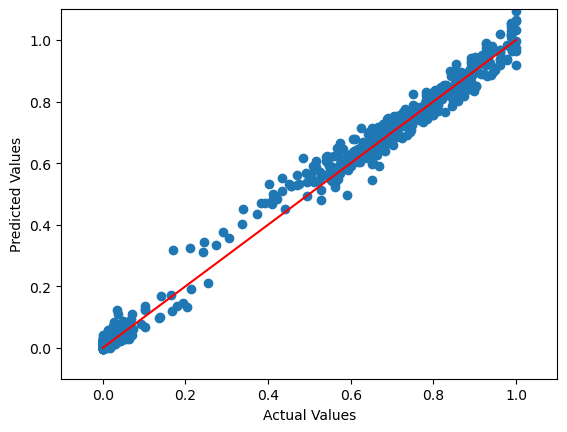

In [26]:
# 다중 출력을 다루는 신경망 모델 정의
nn_final = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2)  # 출력 레이어의 뉴런이 2개 (다중 출력)
])

# 모델 컴파일
nn_final.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
nn_final.fit(x_train, y_train, epochs=77, batch_size=15, validation_split=0.2)

nn_final_pred = nn_final.predict(x_test)

# 모델 평가
mse = MSE(y_test, nn_final_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

# 작을 수록 더 좋음
print(nn_final.evaluate(x_train, y_train))
print(nn_final.evaluate(x_test, y_test))

plt.scatter(y_test,nn_final_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

# Reverse trace (Bayesian Optimization)

In [35]:
x_data = t_dataset.drop("T_mean", axis = 1, inplace = False)
x_data = x_data.drop("T_SD", axis = 1, inplace = False)

y_data = t_dataset["T_mean"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 1)

In [38]:
from bayes_opt import BayesianOptimization

def train_acc(n_estimators):
    
    rf_final = RandomForestRegressor(n_estimators=int(n_estimators), random_state=42)
    rf_final.fit(x_train, y_train)
    
   # Validation
    y_pred = rf_final.predict(x_test)
    acc= rf_final.score(x_test, y_test)
    
    return acc

pbounds = {'n_estimators': (10, 500)} # 범위 설정

optimizer = BayesianOptimization(
    f=train_acc,
    pbounds=pbounds ,
    random_state=1)

optimizer.maximize(init_points=5 , n_iter= 100) 

|   iter    |  target   | n_esti... |
-------------------------------------
| 1         | 0.9914    | 214.3     |
| 2         | 0.9917    | 363.0     |
| 3         | 0.9839    | 10.06     |
| 4         | 0.9913    | 158.1     |
| 5         | 0.9917    | 81.91     |
| 6         | 0.9917    | 80.16     |
| 7         | 0.9916    | 294.1     |
| 8         | 0.9917    | 435.3     |
| 9         | 0.9918    | 500.0     |
| 10        | 0.9915    | 254.8     |
| 11        | 0.9917    | 399.1     |
| 12        | 0.9918    | 469.4     |
| 13        | 0.9917    | 328.7     |
| 14        | 0.9912    | 124.8     |
| 15        | 0.9914    | 187.1     |
| 16        | 0.9917    | 485.7     |
| 17        | 0.9917    | 381.0     |
| 18        | 0.9917    | 452.3     |
| 19        | 0.9915    | 274.7     |
| 20        | 0.9917    | 417.5     |
| 21        | 0.9916    | 345.3     |
| 22        | 0.9916    | 312.1     |
| 23        | 0.9914    | 235.6     |
| 24        | 0.9918    | 475.8     |
| 25        

Mean Squared Error: 0.00020692649086189629
0.9977700908228802
0.9917646430958778


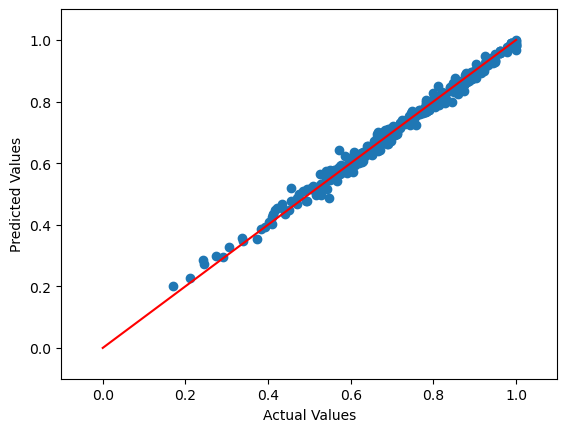

In [39]:
rf_final = RandomForestRegressor(n_estimators=500, random_state=42)
rf_final.fit(x_train, y_train)

rf_final_pred = rf_final.predict(x_test)
# 모델 평가
mse = MSE(y_test, rf_final_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화 (예시
x = np.linspace(0, 1, 10)

print(rf_final.score(x_train, y_train))
print(rf_final.score(x_test, y_test))
plt.scatter(y_test,rf_final_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

In [79]:
rf_final.predict([[3.4, 1.8, 3]])

array([0.8758301])

In [80]:
from bayes_opt import BayesianOptimization

nSub = 3.4
nARC = 1.8
# thARC = 0.5

def train_acc(thARC):
    rf_final = RandomForestRegressor(n_estimators=500, random_state=42)
    rf_final.fit(x_train, y_train)
   # Validation
    T_pred = rf_final.predict([[nSub, nARC, thARC]])

    return T_pred[0]

pbounds = {'thARC': (0, 3.0)} # 범위 설정
# pbounds = {'nARC': (1.0, 2.0)} # 범위 설정

optimizer = BayesianOptimization(
    f=train_acc,
    pbounds=pbounds ,
    random_state=1,
    allow_duplicate_points=True)

optimizer.maximize(init_points=5 , n_iter= 50) 

|   iter    |  target   |   thARC   |
-------------------------------------
| 1         | 0.8758    | 1.251     |
| 2         | 0.8758    | 2.161     |
| 3         | 0.6916    | 0.0003431 |
| 4         | 0.8758    | 0.907     |
| 5         | 0.7324    | 0.4403    |
| 6         | 0.8758    | 2.966     |
| 7         | 0.8758    | 2.567     |
| 8         | 0.8758    | 1.251     |
| 9         | 0.8758    | 1.731     |
| 10        | 0.8758    | 1.941     |
| 11        | 0.8758    | 1.064     |
| 12        | 0.8758    | 2.779     |
| 13        | 0.8758    | 1.489     |
| 14        | 0.8758    | 2.364     |
| 15        | 0.8758    | 1.371     |
| 16        | 0.8758    | 0.9742    |
| 17        | 0.8758    | 1.617     |
| 18        | 0.8758    | 2.882     |
| 19        | 0.8758    | 2.052     |
| 20        | 0.8758    | 2.465     |
| 21        | 0.8758    | 1.836     |
| 22        | 0.8758    | 2.673     |
| 23        | 0.8758    | 2.262     |
| 24        | 0.8758    | 1.158     |
| 25        